# Shakespeare's World

#womenwriters hashtag: https://www.zooniverse.org/projects/zooniverse/shakespeares-world/talk/229/20878?comment=43161


### Some results


**Userbase:**

* Top 5 users make up 50% of the comments.
* Top 20 users make up 80% of the comments. 

**Types of forum posts:**

The two most popular subforums are:

1. General comment threads about individual subjects - 77.68%
2. A place to ask for help and report bugs - 8.09%

In total, 85.12% of the posts are about as text. 


**Most commoon outgoing links:**

* www.zooniverse.org, 205
* en.wikipedia.org, 77
* books.google.com, 32
* books.google.co.uk, 31
* panoptes-uploads.zooniverse.org, 19
* www.shakespearesworld.org, 12

---

### Technical details: talkanalyzer methods

To make the notebook a bit cleaner, some functions are imported from the ``talkanalyzer`` module (import as ``ta``). This module could then be re-used for any other Talk page if the format is the same. Note that the module takes a Pandas dataframe as input for the data, so this needs to be installed too. 

**1. Class URLconstructor**

To make URLs from the various data points, some functions are provided: 

```Python
    print(ta.URLconstructor.commenturl(700, df)) # Make URL to a comment
    print(ta.URLconstructor.threadturl(40565, df)) # Make URL to thread
    print(ta.URLconstructor.userurl("Hannebambel", df)) # Make URL to user
```


**2. Class Printer**

For easier printing of information that you need from the data, some printing functions are provided. To print HTML, add the optional flag `html=True` (Boolean set to ``False`` by default):

```Python
    ta.Printer.regexpsearch("pippin.*", df) # Search/print regular expression
    ta.Printer.usercomments("Hannebambel", df, html=True) # Print html comments from specific user
    ta.Printer.thread(20690, df) # Print a thread. 
```

**3. Class TimeSeries**

Returns a time series plot for easy tracking of words and users. By setting the optional flag `plot=False` it instead returns a time series as a dictionary. 

```Python
    ta.TimeSeries.regexpsearch('women.*', df) # Returns plot for expression "women" / day.
    ta.TimeSeries.usersearch('Cuboctahedron', df, plot=False)# Returns time series as dictionary for user. 
```

**4. Class Network**
Returns a network visualization of various entry-points to the data. The networks are outdegree networks and put either a search term, a user or a hashtag as focal point. 


````Python
    ta.Network.hashtaghashtagnetwork(searchstring, df, plot=True, html=False)
    ta.Network.hashtagusernetwork(searchstring, df, plot=True, html=False)
    ta.Network.regexpusernetwork(searchstring, df, plot=True, html=False)
    ta.Network.userhashtagnetwork(searchstring, df, plot=True, html=False)
    ta.Network.userusernetwork(searchstring, df, plot=True, html=False)
````

In [27]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
import talkanalyzer as ta # Requires pandas
#help(ta)

In [28]:
df = pd.read_json(".data/project-376-comments_2017-04-28.json")
df.tail()

,board_description,board_id,board_title,comment_body,comment_created_at,comment_focus_id,comment_focus_type,comment_id,comment_user_id,comment_user_login,discussion_id,discussion_title
9801,General comment threads about individual subjects,192,Notes,"OK, I see the actual recipe for ""Gillye"" in 12...",2017-04-27 20:20:48.675,1273727.0,Subject,519073,1553558,schub,40565,Subject 1273727
9802,General comment threads about individual subjects,192,Notes,"""as will make it justt fartt"" makes me wonder ...",2017-04-27 22:14:40.292,1273704.0,Subject,519330,1553558,schub,312323,Subject 1273704
9803,General comment threads about individual subjects,192,Notes,Guilford Slingsby has a bit of a problem: he h...,2017-04-28 05:45:26.040,1275677.0,Subject,519812,352990,mutabilitie,312594,Subject 1275677
9804,General comment threads about individual subjects,192,Notes,Thanks for the feedback; I think you're absolu...,2017-04-28 09:04:36.372,1277827.0,Subject,520031,428120,Christoferos,311663,Subject 1277827
9805,General comment threads about individual subjects,192,Notes,"I think that ""oyle of acterill"" must be some s...",2017-04-28 13:41:46.063,1273704.0,Subject,520450,3697,carl801,312323,Subject 1273704


In [29]:
#df.comment_user_login.value_counts()
df.comment_user_login.count()

9806

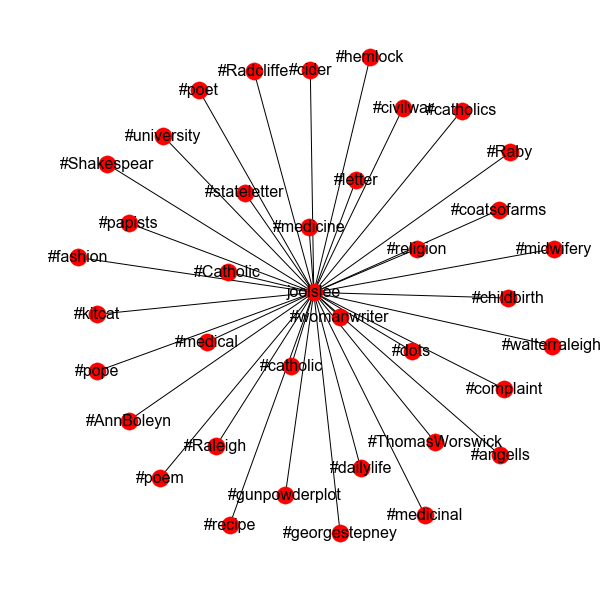

In [30]:
# Test modules and functions
import warnings 
warnings.filterwarnings('ignore') # Remove for debugging

#ta.Printer.regexpsearch("sick.*", df, html=False) # I need to pass the dataframe to the module class
#ta.Printer.usercomments("Hannebambel", df, html=True)
#ta.Printer.thread(20690, df)
#print(ta.URLconstructor.commenturl(700, df))
#print(ta.URLconstructor.threadturl(10065, df))
#print(ta.URLconstructor.userurl("Hannebambel", df))
#ta.TimeSeries.regexpsearch('sick.*', df)
#ta.TimeSeries.usersearch('mutabilitie', df)

#ta.Network.userusernetwork("mutabilitie", df)
ta.Network.userhashtagnetwork("joolslee", df)

## Most frequent users

Result: 
* Top 5 users make up 50% of the comments.
* Top 20 users make up 80% of the comments. 

In [31]:
mostfrequentusers = df.comment_user_login.value_counts()[0:10] # Increase this. 
cumulative = 0
counter = 0
for key, value in mostfrequentusers.items():
    counter += 1
    print(str(counter) + ". " + key, 
          str(round(value / len(df) * 100, 2)) + "%")
    cumulative += round(value / len(df) * 100, 2)
    print("\t\t\t\t\tCumulative first " + 
          str(counter) + " users: " + str(cumulative) + "%")

1. mutabilitie 17.91%
					Cumulative first 1 users: 17.91%
2. Cuboctahedron 11.94%
					Cumulative first 2 users: 29.85%
3. jules 7.08%
					Cumulative first 3 users: 36.93%
4. S_Powell 6.58%
					Cumulative first 4 users: 43.51%
5. parsfan 5.99%
					Cumulative first 5 users: 49.5%
6. VVH 5.0%
					Cumulative first 6 users: 54.5%
7. Traceydix 4.65%
					Cumulative first 7 users: 59.15%
8. Greensleeves 3.55%
					Cumulative first 8 users: 62.7%
9. LWSmith 3.55%
					Cumulative first 9 users: 66.25%
10. cdorsett 2.96%
					Cumulative first 10 users: 69.21%


---
## Track a specific user
To track individual users you can use two methods.
1. Print out the users comments.
2. View the user activity over time.

In [32]:
# Print user comments
ta.Printer.usercomments('jules', df)

Analysing user: jules: https://www.zooniverse.org/projects/zooniverse/shakespeares-world/users/jules

1. jules
Lotions and potions for burns, scalds and a variety of sores. One of the easier texts to read I've come across! Margaret Baker #womanwriter
Comment URL: https://www.zooniverse.org/projects/zooniverse/shakespeares-world/talk/192/19082?comment=38469
Date of post: 2015-11-28 00:38:10


2. jules
Do we transcribe the Latin text too?
Comment URL: https://www.zooniverse.org/projects/zooniverse/shakespeares-world/talk/192/19088?comment=38476
Date of post: 2015-11-28 00:54:06


3. jules
Under the last remedy "for the piles" - anyone know what "reasons of the sonne" are? Raisins? Grapes? I'm intrigued!
Comment URL: https://www.zooniverse.org/projects/zooniverse/shakespeares-world/talk/192/19091?comment=38479
Date of post: 2015-11-28 01:10:54


4. jules
Wow - that certainly looks fragile.
Comment URL: https://www.zooniverse.org/projects/zooniverse/shakespeares-world/talk/192/19023?commen

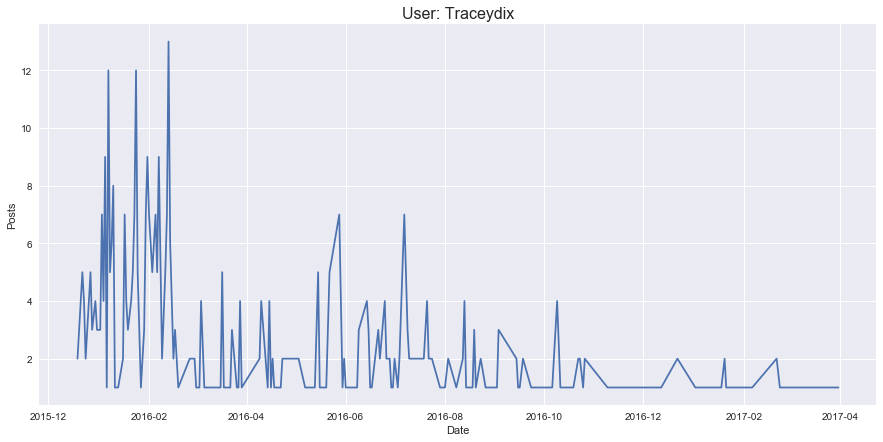

In [33]:
# Plot user activity (comments per day.)
ta.TimeSeries.usersearch('Traceydix', df, plot=True)

---
## Search using regular expressions
- Add ``.*`` before or after to get remaining text on each line. 

Regular expression to find most top level domains:
    
    'http[s]\:\/\/.*\.(?:nl|se|no|es|milru|fr|es|uk|ca|de|jp|au|us|ch|it|io|org|com|net|int|edu|mil|arpa)\/'

In [34]:
ta.Printer.regexpsearch('beer', df, html=False, context=True)



Index ID: 123
	beare you see is actually referring to 'beer', and alle is referring 'ale' (although
https://www.zooniverse.org/projects/zooniverse/shakespeares-world/talk/192/20633?comment=42180
Date of post: 2015-12-10 17:01:56


Index ID: 1044
	t Durham Cathedral. Can't find buttered beer in Gervase Markham but he's a little la
https://www.zooniverse.org/projects/zooniverse/shakespeares-world/talk/192/21331?comment=45299
Date of post: 2015-12-18 21:08:25


Index ID: 1055
	 over Christmas to include the buttered beer recipe from Good Huswifes Handmaide for
https://www.zooniverse.org/projects/zooniverse/shakespeares-world/talk/192/21331?comment=45322
Date of post: 2015-12-18 22:35:29


Index ID: 1179
	d before the 'beire', it's most likely 'beer'. Have a look in the common confusion s
https://www.zooniverse.org/projects/zooniverse/shakespeares-world/talk/192/22225?comment=45973
Date of post: 2015-12-21 00:55:16


Index ID: 1912
	rain for malting for use mainly to brew beer or ale, bu

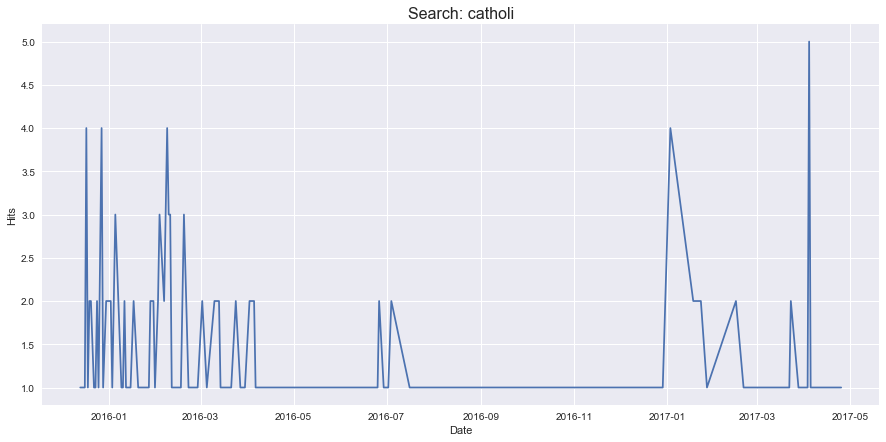

In [35]:
ta.TimeSeries.regexpsearch('catholi', df)

In [36]:
# Most common URLs linked. Note: fix regular expression to be more accurate. 
listofURLS = []
for row in df.iterrows():
    topURL = re.findall('http[s]\:\/\/.*\.(?:nl|se|no|es|milru|fr|es|uk|ca|de|jp|au|us|ch|it|io|org|com|net|int|edu|mil|arpa)\/', row[1][3])
    if topURL:
        for t in topURL:
            listofURLS.append(t)
            
from collections import Counter

for key in Counter(listofURLS).most_common(20):
    print(key)

('https://www.zooniverse.org/', 205)
('https://en.wikipedia.org/', 77)
('https://books.google.com/', 32)
('https://books.google.co.uk/', 31)
('https://panoptes-uploads.zooniverse.org/', 19)
('https://www.shakespearesworld.org/', 12)
('https://github.com/', 8)
('https://recipes.hypotheses.org/', 6)
('https://luna.folger.edu/', 6)
('https://www.dropbox.com/', 5)
('https://books.google.com.au/', 4)
('https://archive.org/', 3)
('https://panoptes.zooniverse.org/oauth/authorize?response_type=token&client_id=2abed6ac014d4a8416a1f578de922600451a10c759dfeab6c9f0edbeb91c8f88&redirect_uri=https://www.shakespearesworld.org/', 3)
('https://books.google.de/', 3)
('https://www.youtube.com/', 3)
('https://blog.shakespearesworld.org/', 3)
('https://www.edx.org/', 2)
('https://historyofbread.wordpress.com/', 2)
('https://c2.staticflickr.com/', 2)
('https://www.flickr.com/', 2)


## Thread Analysis

1. Longest threads
2. Print each thread by id number

In [37]:
# Longest threads
df.discussion_id.value_counts()[0:15]

28632     71
20628     60
38466     52
57041     45
27526     39
20496     38
41673     33
21331     32
252424    31
154452    29
20872     27
37559     24
19237     24
20635     23
40431     23
Name: discussion_id, dtype: int64

In [38]:
# A particular forum thread
ta.Printer.thread(57041, df)

Thread URL: https://www.zooniverse.org/projects/zooniverse/shakespeares-world/talk/243/57041

1. VVH
We're going to start giving regular project updates every Friday about the number of retired pages, number of transcriptions submitted and the number of registered users participating on the project. I'm posting today (Thursday) and will post again tomorrow to see if we manage to retire a few pages in the next 24 hours. I bet we will! 

* 3,383 pages have been retired since 10 December, 2015
* 63,071 transcriptions have been submitted in that time
* 1,861 registered users have taken part in the project, in addition to several thousand unregistered users. 

You can keep your eye on the stats yourself by scrolling to the bottom of this page: [https://www.zooniverse.org/projects/zooniverse/shakespeares-world](https://www.example.com). 
Comment URL: https://www.zooniverse.org/projects/zooniverse/shakespeares-world/talk/243/57041?comment=112872


2. VVH
As of Friday afternoon (GMT) we've ret

In [39]:
# Calculate how many percent of comments are "subject related (related to texts)
print(str(round(df.comment_focus_type.count() / df.comment_body.count(), 4) * 100) + "%")

85.12%


In [40]:
# Sum of posts in each subforum.
for key, value in df.board_description.value_counts().items():
    print(key, value)
    print(str(round(value/len(df), 4) * 100) + "%\n")

General comment threads about individual subjects 7617
77.68%

A place to ask for help and report bugs. 793
8.09%

Ask us about specific manuscripts, scripts, handwriting, palaeography, authors, genres or other points of interest arising from your transcriptions. 435
4.44%

Think you've found a new word or variant or an earlier instance of a word than what's recorded in the OED? Let us know here!  334
3.41%

Nominate recipes that you want to try to make at home. These usually don't have exact quantities, so if you'd like to try a recipe, decide on quantities and share your results with the community, we're eager to hear and see what you make!   198
2.02%

We'll thread together common questions. Check here to see if your question has been discussed before.  162
1.65%

Have you spotted a #womanwriter or an #autobiography by a woman? Please use this hashtag to flag her up so that Victoria can look at this manuscript. Autobiographies can include cookbooks, financial accounts, letters, diar

## Entire dataset: time series

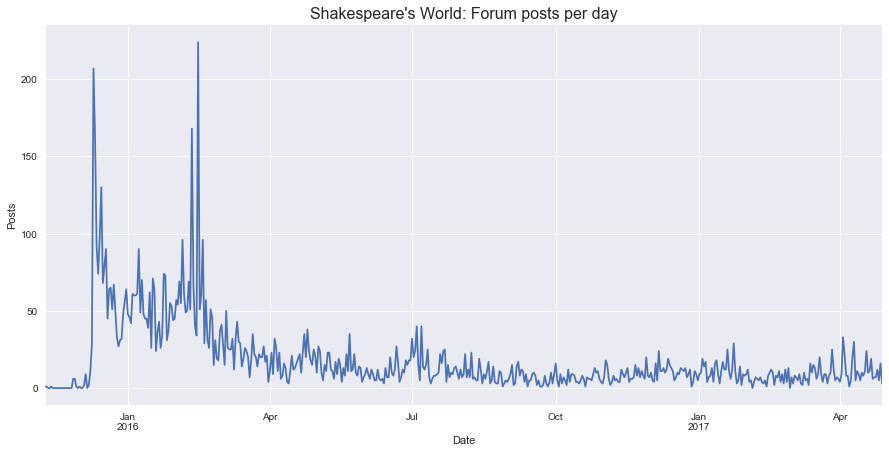

In [41]:
def postsTimeSeries():
    '''Create a time series based on posts per day
    using the dfT dataframe (index by datetime)'''
    dfT = df
    pd.created_at = pd.to_datetime(dfT.comment_created_at, format='%H:%M') # Lite fulparsning av tidsstämpel här.
    dfT.index = pd.created_at
  
    postsperday = dfT.resample('1440T', base=60).count() #1440 min./day

    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(111)

    plt.title('Shakespeare\'s World: Forum posts per day', size=16)

    postsperday['comment_body'].plot() #Plot each individual tweet per minute
    
    plt.xlabel('Date')
    plt.ylabel('Posts')

postsTimeSeries()

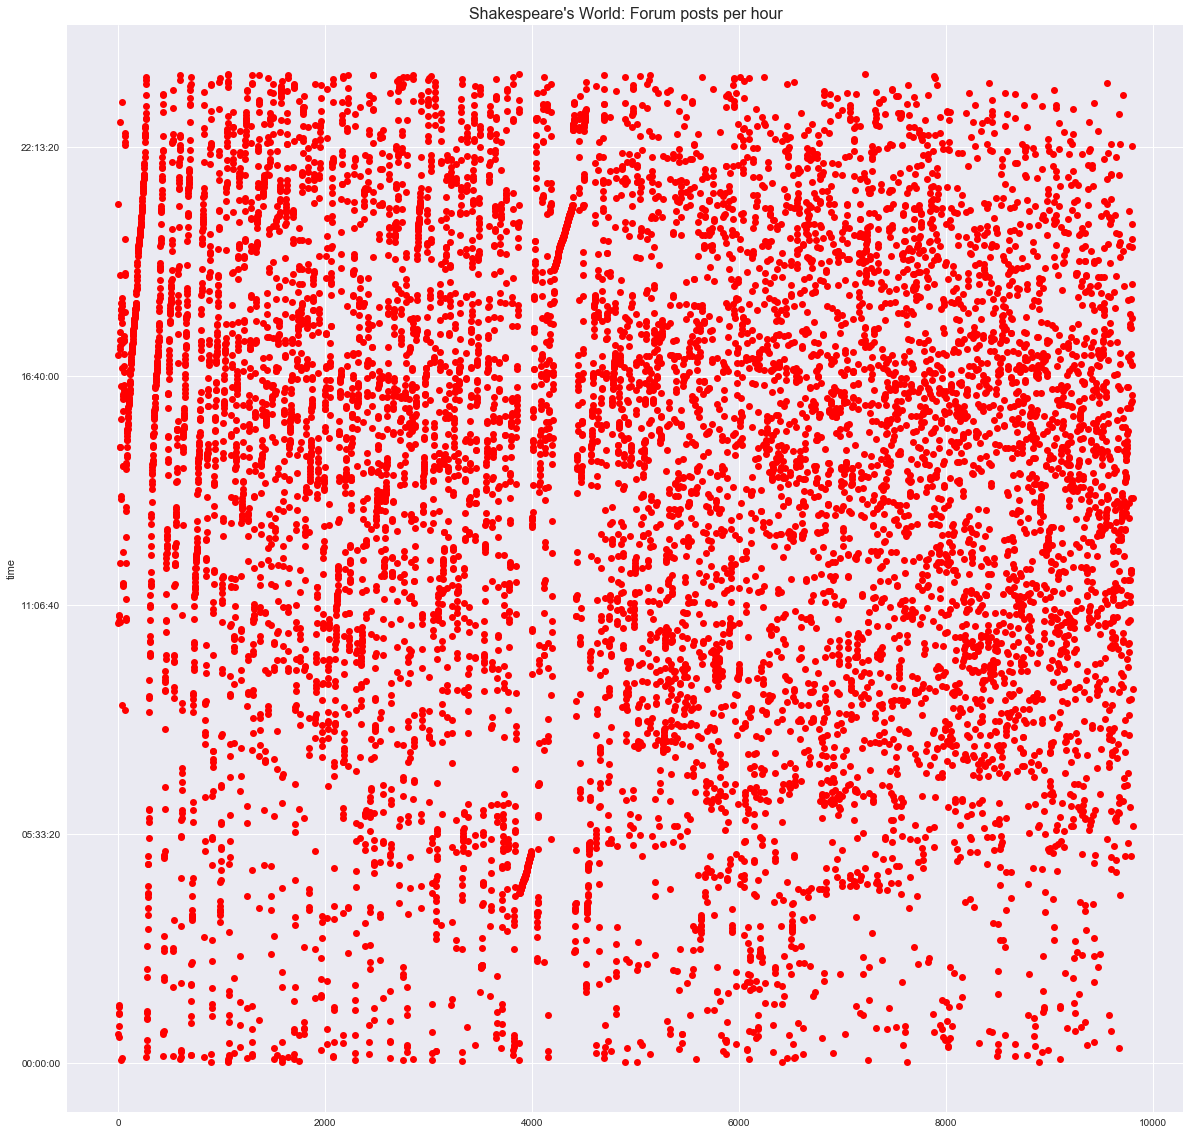

In [42]:
def postsDailyAverage():
    '''Create a time series based on posts per day
    using the dfT dataframe (index by datetime)'''
    dfT = df
    pd.created_at = pd.to_datetime(dfT.comment_created_at, format='%H:%M') # Lite fulparsning av tidsstämpel här.
    dfT.index = pd.created_at
  
    postsperday = df
    
    
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(111)

    plt.title('Shakespeare\'s World: Forum posts per hour', size=16)

    plt.plot(postsperday.index.time, 'ro')
    
    #plt.xlabel('Time')
    #plt.ylabel('Posts')

postsDailyAverage()

## Network analysis

### Complete dataset: User thread-network
Create gexf network file. Note. This is very bloated and it is better to create small networks with the functions below. 

In [43]:
#from gexf import * # https://github.com/paulgirard/pygexf
def createThreadUserNet(dataframe):
    # Intialize network file
    gexf = Gexf("Shakespeares World", "Thread User Network")
    graph = gexf.addGraph("directed", "static", "Thread User directed network")

    # Create nodes
    for user in df.comment_user_login.iteritems():
        graph.addNode(str(user[1]), str(user[1]))

    for thread in df.discussion_id.iteritems():
        graph.addNode(str(thread[1]), str(thread[1]))

    # Create edges
    counter = 0
    for x in df.iterrows():
        counter += 1
        #print(x[1][9]) # Username
        # print(x[1][10]) # Comment thread ID
        graph.addEdge(str(counter), str(x[1][9]), str(x[1][10]))

    # Write file. Note: all nodes and edges need to be added as unicode strings
    output_file = open("shakspearesworldThreadUserNet.gexf","wb")
    gexf.write(output_file)

#createThreadUserNet(df)

## Section networks: users, hashtag, regexpsearches

There are five types of networks that can be created in the ``ta.Network`` class, each of them described in order:

````Python
hashtaghashtagnetwork(searchstring, df, plot=True, html=False)
hashtagusernetwork(searchstring, df, plot=True, html=False)
regexpusernetwork(searchstring, df, plot=True, html=False)
userhashtagnetwork(searchstring, df, plot=True, html=False)
userusernetwork(searchstring, df, plot=True, html=False)
````

### Hashtag/hashtag network
This network creates one hashtag in the middle, then plots all other hashtags that co-occur in the same post connects them. The more frequent the co-occurrence, the closer to the middle search string. 

Searching for: #catholic


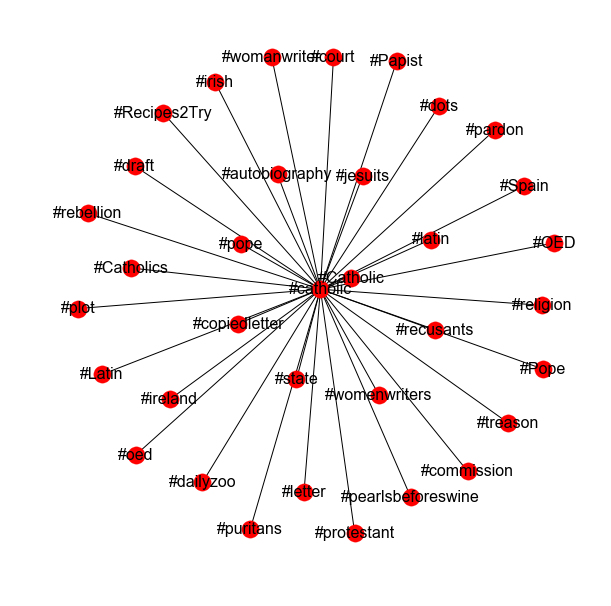

In [44]:
ta.Network.hashtaghashtagnetwork("#catholic", df)

### Hashtag/user network
This takes a hashtag and then plots a network based on which users that has written about it in the forum. The closer to the center concept, the more often the users write about it. 

Searching for: #womanwriter


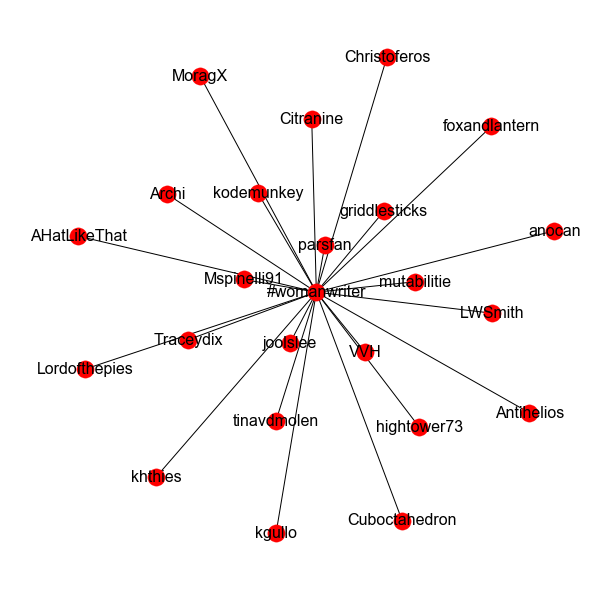

In [45]:
ta.Network.hashtagusernetwork("#womanwriter", df, plot=True, html=False)

### Regexp/user network
Similar to the hashtag/user network but using the power of Python flavoured regexps. Case insensivive. 

Searching for: cathol|papist|pope


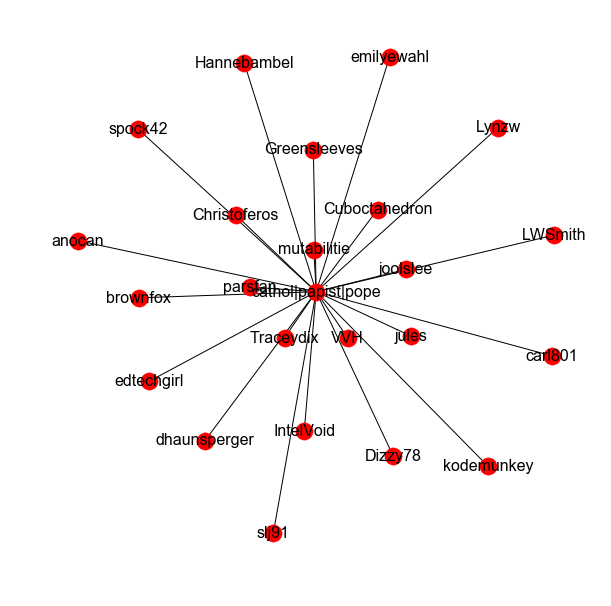

In [46]:
ta.Network.regexpusernetwork("cathol|papist|pope", df)

### User/hashtag network
Tracks what hashtag a specific username writes. 

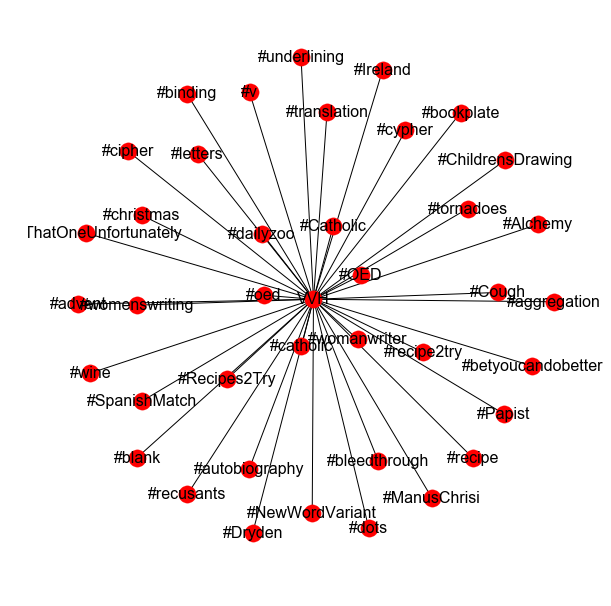

In [47]:
ta.Network.userhashtagnetwork("VVH", df)

### User/user network
Takes a specific user and draws a network from the users spoken to, using the @username convention. 

This is an out-degree network. 

** Todo **: make in-degree network to see which users address a user (comparable to incoming @-tweets on Twitter). 

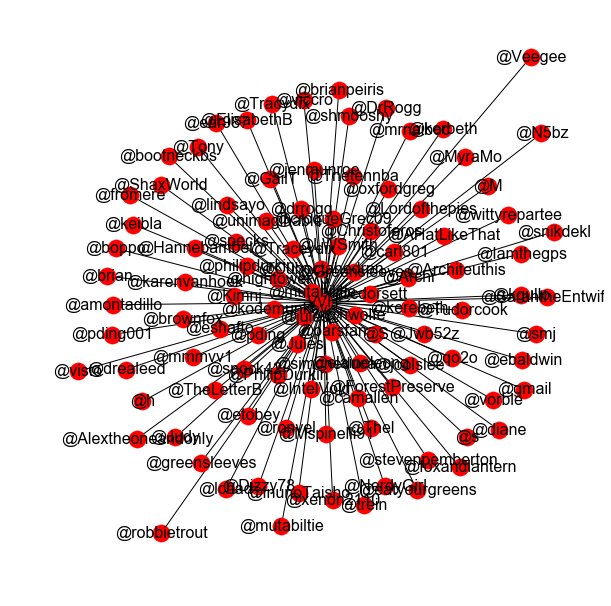

In [48]:
ta.Network.userusernetwork("VVH", df)